### Simple Harmonic Oscillator

This notebook solves a driven simple harmonic oscillator system written in first-order form
$$
\begin{aligned}
\dot u &= v\\
\dot v &= -100 u + 8\cos(9t)
\end{aligned}
$$
The equations are solved using the Midpoint method.

The solution vector is 
$$
y = \left(\begin{array}{c} u\\ v\end{array}\right).
$$

In [1]:
using Plots

#### The Midpoint Method

This function implements the midpoint method.  The arguments are
```
midpoint!(rhs, y0, t, dt, pars)

    rhs  -> A function with the RHS of the ODEs
    y0   -> The solution vector.  Here y0 = [u, v]
    t    -> The current time
    dt   -> The time step
    pars -> An abstract data type that contains any necessary 
            parameters for the equations.  Not used here.
```

In [2]:
function midpoint!(rhs, y0, t, dt, pars)
    #
    # rhs is the function that evaluates the RHS of the ODE.
    # pars is an arbitrary list of parameters that are simply passed to rhs.
    #
    y1 = similar(y0)
    f = similar(y0)
    rhs(f, y0, t, pars)
    y1 = y0 + 0.5*dt*f
    
    th = t + 0.5*dt
    rhs(f, y1, th, pars)
    return y0 + dt*f
end

midpoint! (generic function with 1 method)

#### A Function to Evaluate the RHS of the ODEs

In [3]:
function odes!(dy, y, t, pars)
    # pars not needed.
    dy[1] = y[2]
    dy[2] = -100.0*y[1] + 8.0*cos(9.0*t) 
end

odes! (generic function with 1 method)

#### The Exact Solutions

Here `fex2!` is the exact solution as a function of the parameters `p`.  This is the exact solution for $u$.
`dfex2!` is the time derivative of the solution.  This is the exact solution for $v = \dot u$.

These functions are written with the `@.` macro in Julia, which allows the arguments to be interpreted as arrays.

In [4]:
function fex2!(f, p, t)
    @. f = p[1]*cos(10.0*t) + p[2]*sin(10.0*t) + 8.0/19.0*cos(9.0*t)
end
function dfex2!(df, p, t)
    @. df = -10.0*p[1]*sin(10.0*t) + 10.0*p[2]*cos(10.0*t) - 72.0/19.0*sin(9.0*t)
end

dfex2! (generic function with 1 method)

#### Set the initial parameters

Here we set the initial and final times, and discretize with `nt` points.  Here `nt=121` is really not enough for this problem, which has high-frequency components in the solution.  Thus, we expect that the errors in the numerical solution will become large.  To decrease the size of these errors, we can make `nt` larger, from hundreds to thousands of points, increasing the resolution and making $\Delta t$ much smaller.

In [5]:
tmin = 0.0
tmax = 5.0
nt = 121
t = LinRange(tmin, tmax, nt)
u = similar(t)
v = similar(t);

#### Set the initial data

This code is probably more complicated than it needs to be.  It sets the initial values of $u$ and $v$ using the exact solution.

In [6]:
p0 = [1.0, 0.0]
u01 = [0.0]
u02 = [0.0]
t0 = [0.0]
fex2!(u01, p0, t0)
dfex2!(u02, p0, t0)
sol0 = [u01[1], u02[1]]

sol = [0.0, 0.0]
pars = [0.0]
u[1] = sol0[1]
v[1] = sol0[2]
dt = t[2]-t[1]

0.041666666666666664

#### Loop to solve the ODEs

In [7]:
for i = 2:nt
    sol = midpoint!(odes!,sol0,t[i],dt,pars)
    u[i] = sol[1]
    v[i] = sol[2]
    sol0 = sol
end

#### Calculate the exact solutions for comparison and plot

In the plot below, the numerical solutions have solid lines, and the exact solutions have dashed lines.  Individual points are plotted for $v$ to show how the step size, $\Delta t$, compares to the scale for changes in the solution.

In [8]:
uexact = similar(t)
vexact = similar(t)
fex2!(uexact, p0, t)
dfex2!(vexact, p0, t);

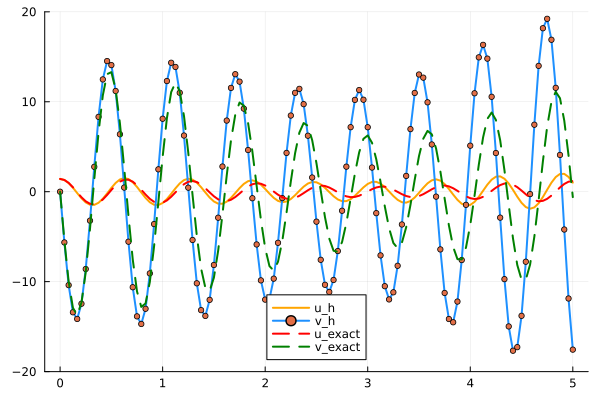

In [9]:
plot(t,u,label="u_h",linecolor=:orange,lw=2,legend=:bottom,ylim=(-20,20))
plot!(t,v,label="v_h",linecolor=:dodgerblue,lw=2, marker=3)
plot!(t,uexact,label="u_exact",color=:red,linestyle=:dash,lw=2)
plot!(t,vexact,label="v_exact",color=:green,linestyle=:dash,lw=2)

#### Calculate the error in the discrete solution and plot

In [10]:
erru = similar(u)
errv = similar(v)
@. erru = u - uexact
@. errv = v - vexact;

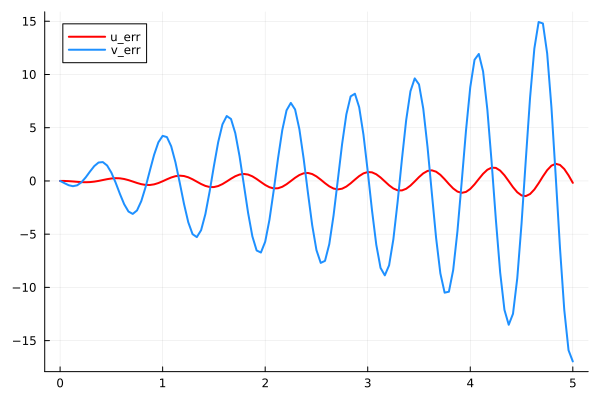

In [11]:
plot(t,erru,color=:red,label="u_err",lw=2)
plot!(t,errv,color=:dodgerblue,label="v_err",lw=2)